# Анализ рынка заведений общественного питания Москвы

**Содержание:**
* [1. Исследование данных и их предобработка](#Исследование-данных-и-их-предобработка)
 * [1.1 Загрузка данных и извлечение информации](#Загрузка-данных-и-извлечение-информации)
* [2. Анализ данных.](#Анализ-данных)
 * [2.1 Исследование соотношения видов объектов общественного питания по количеству](#Исследование-соотношения-видов-объектов-общественного-питания-по-количеству)
 * [2.2 Исследование соотношения сетевых и несетевых заведений по количеству](#Исследование-соотношения-сетевых-и-несетевых-заведений-по-количеству)
 * [2.3 Характер сетевого распространения объектов по виду объекта](#Характер-сетевого-распространения-объектов-по-виду-объекта)
 * [2.4 Среднее количество посадочных мест](#Среднее-количество-посадочных-мест)
 * [2.5 Топ-10 улиц по количеству объектов общественного питания](#Топ-10-улиц-по-количеству-объектов-общественного-питания)
 * [2.6 Определение популярных районов](#Определение-популярных-районов)
 * [2.7 Районы с небольшим количеством заведений](#Районы-с-небольшим-количеством-заведений)
* [3. Вывод](#Вывод)

Наши партнеры решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Партнеры решили обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможет ли такой формат кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Партнеры просят нас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.  
В целях данного исследования необходимо дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения и прокомментировать возможность развития сети.

**Полученные данные хранятся в файле:**  
`rest_data.csv`

**Описание данных:**

- `id` — идентификатор объекта;  
- `object_name` — название объекта общественного питания;  
- `chain` — сетевой ресторан;  
- `object_type` — тип объекта общественного питания;  
- `address` — адрес;  
- `number` — количество посадочных мест.

## Исследование данных и их предобработка 

### Загрузка данных и извлечение информации

Начнем с импорта необходимых для работы библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Импортируем предоставленныый файл и сохраним его в переменной df

In [3]:
try:
    df = pd.read_csv('/datasets/rest_data.csv')
except:
    df = pd.read_csv('rest_data.csv')

Изучим данные в файле, выведем на экран первые 5 строк датафрейма, общую информацию, информацию о доли пропущенных значений и колчестве явных дубликатов:

In [4]:
print('Внешний вид датафрейма:')
display(df.head(5))
print('``````````````````````````````````````````````````')
print('Типы данных, кол-во строк и столбцов:')
print(df.info())
print('``````````````````````````````````````````````````')
print('Доля пропущенных значений:')    
print(df.isnull().mean())
print('``````````````````````````````````````````````````')
print('Количество явных дубликатов:')
print(df.duplicated().sum())
print('``````````````````````````````````````````````````')

Внешний вид датафрейма:


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


``````````````````````````````````````````````````
Типы данных, кол-во строк и столбцов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None
``````````````````````````````````````````````````
Доля пропущенных значений:
id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64
``````````````````````````````````````````````````
Количество явных дубликатов:
0
``````````````````````````````````````````````````


Типы данных соответствуют заявленной информации, пропусков нет, явных дубликатов тоже нет.  
Приведем весь текст к нижнему регистру и изучим подробнее столбцы `object_name`, `chain`, `object_type` и `address`. 

### Контрольная предобработка

Данные в столбце `object_name` приведем к нижнему регистру:

In [5]:
df['object_name'] = df['object_name'].str.lower()

In [6]:
#посмотрим сколько уникальных названий в колонке object name
print(df['object_name'].unique())
print(len(df['object_name'].unique()))

['сметана' 'родник' 'кафе «академия»' ... 'бар мята lounge'
 'мята lounge октябрьская' 'кальянная «мята lounge»']
9924


Проверим, что в колонке `chain` есть только значения "да" или "нет":

In [7]:
df['chain'].unique()

array(['нет', 'да'], dtype=object)

Изучим данные столбца `object_type`:

In [8]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Изучим данные столбца `adress` и приведем данные к нижнему регистру для удобства будущих вычислений:

In [9]:
df['address']

0               город Москва, улица Егора Абакумова, дом 9
1        город Москва, улица Талалихина, дом 2/1, корпус 1
2                город Москва, Абельмановская улица, дом 6
3                  город Москва, Абрамцевская улица, дом 1
4        город Москва, Абрамцевская улица, дом 9, корпус 1
                               ...                        
15361         город Москва, 3-й Крутицкий переулок, дом 18
15362             город Москва, улица Земляной Вал, дом 33
15363             город Москва, улица Земляной Вал, дом 33
15364    город Москва, поселение Московский, Киевское ш...
15365               город Москва, Ходынский бульвар, дом 4
Name: address, Length: 15366, dtype: object

In [10]:
df['address'] = df['address'].str.lower()
df['address']

0               город москва, улица егора абакумова, дом 9
1        город москва, улица талалихина, дом 2/1, корпус 1
2                город москва, абельмановская улица, дом 6
3                  город москва, абрамцевская улица, дом 1
4        город москва, абрамцевская улица, дом 9, корпус 1
                               ...                        
15361         город москва, 3-й крутицкий переулок, дом 18
15362             город москва, улица земляной вал, дом 33
15363             город москва, улица земляной вал, дом 33
15364    город москва, поселение московский, киевское ш...
15365               город москва, ходынский бульвар, дом 4
Name: address, Length: 15366, dtype: object

Проведем еще одну проверку на дубликаты, поскольку id записи могло присваиваться автоматически, удалим дубликаты, если таковые есть, исключая колонку id:

In [11]:
df = df.drop_duplicates(subset=df.columns.difference(['id']))

Наше подтверждение подтвердилось, в нашем датафрейме было 85 дубликатов, по всем колонкам, исключая id. Это могло быть связано с технической ошибкой, в результате которой данные задвоились.

Посмотрим, есть ли в колонке с колчичеством посадочных мест аномалии и выбросы. Если таковые есть, то лучше избавиться от них на данном этапе, чтобы они не искажали визуализацию в будущем исследовании:

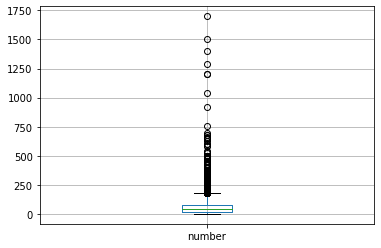

In [12]:
df.boxplot('number');

In [13]:
len(df[df['number']> 500]) / len(df) * 100

0.15705778417642824

Всего 1,86% заведений, у которых посадочных мест больше 250. С учетом того, что наша задача от клиента - анализ данных для открытия кафе, то вряд ли в нем будет более 250 мест. Удалим эти данные, во избежание искажений в будущем.

In [14]:
df = df.query('number < 250')

### Промежуточный вывод

Мы привели все данные к нижнему регистру, проверили наш датафрейм на дубликаты, избавились от задвоенных строк по всем параметрам, не включая id,  а так же удалили выбросы по кол-ву посадочных мест, которые превышали 250 мест. 
Посмотрим как теперь выглядит наш датафрейм, и сколько в нем осталось строк.

In [15]:
display(df.head(10))
df.info()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14916 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14916 non-null  int64 
 1   object_name  14916 non-null  object
 2   chain        14916 non-null  object
 3   object_type  14916 non-null  object
 4   address      14916 non-null  object
 5   number       14916 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 815.7+ KB


## Анализ данных

### Исследование соотношения видов объектов общественного питания по количеству

Посмотрим на количество заведений по виду объекта общественного питания и представим информацию в виде барплота

In [16]:
data = df.pivot_table(index='object_type', values='id', aggfunc='count')\
        .reset_index()\
        .sort_values(by='id')
data

,object_type,id
5,магазин (отдел кулинарии),273
2,закусочная,348
4,кафетерий,395
1,буфет,567
0,бар,849
6,предприятие быстрого обслуживания,1892
7,ресторан,2163
8,столовая,2381
3,кафе,6048


In [17]:
import textwrap

def customwrap(s,width=30):
    return "<br>".join(textwrap.wrap(s,width=width))
data['object_type'] = data['object_type'].map(customwrap)
data['object_type']

5               магазин (отдел кулинарии)
2                              закусочная
4                               кафетерий
1                                   буфет
0                                     бар
6    предприятие быстрого<br>обслуживания
7                                ресторан
8                                столовая
3                                    кафе
Name: object_type, dtype: object

In [18]:
fig = px.bar(
    data, x='object_type', y='id', 
    labels=dict({'object_type': 'Вид объекта', 'id':'Количество'}),
    width=800, height=800
)
fig.update_xaxes(tickangle=45)
fig.update_layout(title_text='Соотношение видов объектов общественного питания по количеству', title_x=0.5, 
                 )
fig.show() 

Самыми популярными видами объектов являются кафе, меньше всего в городе отделов кулинарии

### Исследование соотношения сетевых и несетевых заведений по количеству

Посмотрим на соотнонешие сетевых и несетевых заведений по колчичеству, данные визуализируем в виде круговой диаграммы

In [19]:
chain = df.pivot_table(index='chain', values='id', aggfunc='count')\
        .reset_index()\
        .sort_values(by='id')
chain

,chain,id
0,да,2921
1,нет,11995


In [20]:
#Зададим функцию, которая поможет с переименованием легенды, честно найденой на просторах интернета
def new_legend(fig, new_names):
    for item in new_names:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                fig.data[0].labels[i] = new_names[item]
    return(fig)

#И построем саму круговую диаграмму
fig = px.pie(chain, values='id', names='chain')
fig.update_layout(title_text='Соотнонешие сетевых и несетевых заведений по колчичеству', title_x=0.5)
fig.update_traces(pull=0.05)
fig = new_legend(fig = fig, new_names = {'нет':'Несетевые заведения',
                                       'да' : 'Сетевые заведения'})
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()


Несетевых объектов в Москве в 4 раза больше чем сетевых

### Характер сетевого распространения объектов по виду объекта

Проверим, для какого вида объекта общественного питания характерно сетевое распространение.  
Соберем данные и построим график:

In [21]:
rest_chain = df.pivot_table(index=['object_type', 'chain'], values='id', aggfunc='count')\
        .reset_index()\
        .sort_values(by=['chain','id'])
rest_chain

,object_type,chain,id
16,столовая,да,3
2,буфет,да,11
0,бар,да,37
8,кафетерий,да,52
4,закусочная,да,56
10,магазин (отдел кулинарии),да,78
14,ресторан,да,514
12,предприятие быстрого обслуживания,да,783
6,кафе,да,1387
11,магазин (отдел кулинарии),нет,195


In [22]:
fig = px.bar(
    rest_chain, x='object_type', y='id', color='chain',
    labels=dict({'object_type': 'Вид объекта', 'id':'Количество'}),
    width=800, height=800,
    barmode="group"
)
fig.update_layout(legend={"title":"Сетевое заведение"})
fig.update_xaxes(tickangle=45)
fig.update_layout(title_text='Характер сетевого распространения объектов по виду объекта', title_x=0.5)
fig.show() 

По построенному графику видно, что для всех типов объектов и сетевых и нет - самым распространенным является "кафе". Но остальные виды сильно разнятся в сортировке, так, например, на втором месте по популярности у сетевых объектов - "предприятия быстрого питания", а у несетевых - "столовые".
Можно заметить, что для предприятий быстрого обслуживания характерерно сетевое распределение, ведь их количество в городе самое большое относительно несетевых.

Ответим на вопрос, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?  
Для этого сгрупируем данные только по сетевым заведениям:

In [23]:
#делаем дф с выборкой только сетевых заведений
temp = df[df['chain'] == 'да']
display(temp.head(5))
len(temp)

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город москва, большая академическая улица, дом 65",160


2921

In [24]:
#группируем по названиям и считаем общее кол-во заведений в сети
temp1 = temp.pivot_table(index='object_name', values='number', aggfunc=('count', 'mean'))\
        .reset_index()
                         
temp1 = temp1.rename(columns={"count": "total"})
#и убираем все попавшие несетевые
temp1 = temp1[temp1['total'] > 1]
temp1

,object_name,total,mean
3,bocconcino,3.0,66.666667
6,burger club,3.0,20.333333
8,coffeeshop company,4.0,47.250000
9,cofix,25.0,9.600000
11,correas,3.0,44.000000
...,...,...,...
557,шоколадница,157.0,57.184713
561,штолле,13.0,30.076923
563,якитория,36.0,104.055556
567,япоша,2.0,105.000000


Сделаем небольшую категоризацию по числу посадочных мест и кол-ву заведений в сетях, для этого посчитаем перцентили от среднего количества посадочных мест и количества заведений и присвоим каждому из них категории. Всё, что попадает в 33-ий перцентиль будем считать небольшим, следующие 33% считать средним и всё остальное большим.


In [25]:
print(np.percentile(temp1['total'], 33))
print(np.percentile(temp1['total'], 66))

3.0
6.0


In [26]:
print(np.percentile(temp1['mean'], 33))
print(round(np.percentile(temp1['mean'], 66),2))

26.0
66.41


Теперь у нас есть следующая информация:
- Мало заведений - меньше 3-х
- Среднее количество заведений - от 3 до 6
- Большое количество заведений - больше 6
- Мало посадочных мест - меньше 26
- Среднее количество посадочных мест - от 26 до 66
- Большое количество посадочных мест - больше 66

Теперь остается только присвоить категории каждой сети и визуализировать полученные данные

In [27]:
bins = [0, 3, 6, 1000]
labels = ['Мало','Средне','Много']

temp1['Количество заведений'] = pd.cut(temp1['total'], bins=bins, labels=labels)

bins_a = [0, 26, 66, 1000]
labels_a = ['Мало','Средне','Много']
temp1['Количество посадочных'] = pd.cut(temp1['mean'], bins=bins_a, labels=labels_a)

temp1

,object_name,total,mean,Количество заведений,Количество посадочных
3,bocconcino,3.0,66.666667,Мало,Много
6,burger club,3.0,20.333333,Мало,Мало
8,coffeeshop company,4.0,47.250000,Средне,Средне
9,cofix,25.0,9.600000,Много,Мало
11,correas,3.0,44.000000,Мало,Средне
...,...,...,...,...,...
557,шоколадница,157.0,57.184713,Много,Средне
561,штолле,13.0,30.076923,Много,Средне
563,якитория,36.0,104.055556,Много,Много
567,япоша,2.0,105.000000,Мало,Много


In [28]:
temp1 = temp1.pivot_table(index=['Количество заведений', 'Количество посадочных'], 
                          values='object_name', aggfunc='count')\
                          .reset_index()\
                          .sort_values(by='object_name', ascending=False)

In [29]:
temp1

,Количество заведений,Количество посадочных,object_name
2,Мало,Много,46
0,Мало,Мало,38
1,Мало,Средне,33
7,Много,Средне,26
6,Много,Мало,24
5,Средне,Много,20
4,Средне,Средне,18
8,Много,Много,18
3,Средне,Мало,16


In [30]:
# Код ревьюера

pd.cut(pd.Series([1,2,3]), bins=[0,1,2,3,4])

0    (0, 1]
1    (1, 2]
2    (2, 3]
dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]

На основании полученных данных мы можем сказать - что для сетевых заведений характерно малое количество заведений (меньше 3-х) с большим количеством посадочных мест - более 66

### Среднее количество посадочных мест

Для нашего исследования очень помогут данные по среднему количеству посадочных мест по типам заведений. Сгруппируем данные и построим график:

In [31]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [32]:
df['number'].mean()

52.894140520246715

In [33]:
avg_seats = df.pivot_table(index='object_type', 
                           values='number', 
                           aggfunc='mean')\
              .sort_values(by='number', ascending=False)\
              .reset_index()
avg_seats

,object_type,number
0,столовая,114.541369
1,ресторан,80.967175
2,буфет,47.832451
3,бар,40.322733
4,кафе,38.758267
5,предприятие быстрого обслуживания,19.801268
6,кафетерий,9.184810
7,закусочная,7.847701
8,магазин (отдел кулинарии),5.589744


In [34]:
fig = px.bar(
    avg_seats, x='object_type', y='number', 
    labels=dict({'object_type': 'Вид объекта', 'number':'Среднее кол-во посадочных мест'}),
    width=800, height=800
)
fig.update_xaxes(tickangle=45)
fig.update_layout(title_text='Среднее количество посадочных мест', title_x=0.5)
fig.show() 

Получается, что в среднем - самое большое количество посадочных мест в столовых - порядка 115, меньше всего в отделах кулинарии в магазинах, там в среднем 5-6 посадочных мест.

### Топ-10 улиц по количеству объектов общественного питания

Для дальнейших действий в нашем исследовани, необходимо выделить в отдельный столбец датафрейма информацию об улице из столбца address. Сделаем это с помощью регулярных выражений:

In [35]:
import re
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r'.*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+'.format('|'.join(words))

df['street'] = df['address'].str.extract(str_pat, flags=re.I)
df.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица
8,20958,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица
9,28858,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица


In [36]:
# Код ревьюера

try:
    print(re.search(str_pat, "город Москва, проспект Мира").group(1))
except AttributeError as e:
    print("Не нашлось :( Хотя вот же оно.", e)

try:
    print(re.search(str_pat, "город Москва, проспект Мира,").group(1))
except AttributeError as e:
    print("Это не выполнится")


Не нашлось :( Хотя вот же оно. 'NoneType' object has no attribute 'group'
проспект Мира


Построим график ТОП-10 улиц с количеством объектов общественного питания, для этого необходимо сгрупировать наш датафрейм по новому столбцу с названием улиц:

In [37]:
top_10 = df.pivot_table(index='street', 
                           values='id', 
                           aggfunc='count')\
              .sort_values(by='id', ascending=False)\
              .reset_index()
top_10 = top_10.head(10)
top_10 = top_10.sort_values(by='id')
top_10

,street,id
9,кировоградская улица,102
8,каширское шоссе,107
7,кутузовский проспект,111
6,проспект вернадского,125
5,ленинский проспект,142
4,варшавское шоссе,157
3,пресненская набережная,162
2,ленинградский проспект,168
1,профсоюзная улица,181
0,проспект мира,198


In [38]:
fig = px.bar(
    top_10, x='id', y='street', 
    labels=dict({'street': 'Улица', 'id':'Количество заведений'}),
    width=800, height=800
)
fig.update_layout(title_text='ТОП-10 улиц по количеству заведений', title_x=0.5)
fig.show() 

Итак, мы определили, что больше всего заведений общественного питания расположено на Проспекте мира, также в ТОП-10 вошли Профсоюзная улица, Ленинградский проспект и Пресненская набережная. Замыкает чарт Кировоградская улица, на которой без малого 104 заведения.

### Определение популярных районов

Для определения популярных и потенциально перспективных районов, воспользуемся ссылкой на сторонний ресурс, где каждой улице Москвы присвоен район, в котором она находится. Ниже ссылка для скачивания на локальную машину. В нашем же проекте данные будут подтягиваться из открытого доступа из таблиц Google sheets.  
[Ссылка](https://www.kaggle.com/datasets/caerno/moscow-streets?resource=download) на ресурс

In [39]:
from io import BytesIO
import requests
spreadsheet_id = '1MlUuonuo_IcUIHWk-tWnZCHkp97mM-q8xA1qFiZZHew'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
region = pd.read_csv(BytesIO(r.content))
#приведем к нижнему регистру все строки с названием улиц, чтобы соответствовали нашему основному датафрейму
region['streetname'] = region['streetname'].str.lower()
#и поменяем название столбца streetname
region.rename(columns = {'streetname':'street'}, inplace = True)
#проверка на дубликаты и их удаление
region.duplicated().sum()
region = region.drop_duplicates()
region.duplicated().sum()

0

Теперь соединим две таблицы по названиям улиц и определим в каких районах расположены ТОП-10 улиц по количеству заведений, которые мы посчитали ранее:

In [40]:
str_reg = top_10.merge(region, on='street', how='left')
str_reg

,street,id,areaid,okrug,area
0,кировоградская улица,102,109,ЮАО,Район Чертаново Центральное
1,кировоградская улица,102,108,ЮАО,Район Чертаново Северное
2,кировоградская улица,102,110,ЮАО,Район Чертаново Южное
3,каширское шоссе,107,101,ЮАО,Район Москворечье-Сабурово
4,каширское шоссе,107,102,ЮАО,Район Нагатино-Садовники
5,каширское шоссе,107,106,ЮАО,Район Орехово-Борисово Южное
6,каширское шоссе,107,105,ЮАО,Район Орехово-Борисово Северное
7,кутузовский проспект,111,38,ЗАО,Район Дорогомилово
8,кутузовский проспект,111,49,ЗАО,Район Фили-Давыдково
9,проспект вернадского,125,44,ЗАО,Район Проспект Вернадского


И для наглядности сгруппируем данные по районам и выделим ТОП-10 районов, также как сделали это с улицами:

In [41]:
top_10_reg = df.merge(region, on='street', how='left')
top_10_reg = top_10_reg.pivot_table(index='area', 
                           values='id', 
                           aggfunc='count')\
              .sort_values(by='id', ascending=False)\
              .reset_index()
top_10_reg = top_10_reg.head(10)
top_10_reg = top_10_reg.sort_values(by='id')
top_10_reg

,area,id
9,Район Гагаринский,460
8,Район Замоскворечье,469
7,Обручевский район,482
6,Таганский район,530
5,Донской район,568
4,Мещанский район,648
3,Даниловский район,658
2,Басманный район,696
1,Пресненский район,769
0,Тверской район,1099


In [42]:
fig = px.bar(
    top_10_reg, x='id', y='area', 
    labels=dict({'area': 'Район', 'id':'Количество заведений'}),
    width=800, height=800
)
fig.update_layout(title_text='ТОП-10 районов по количеству заведений', title_x=0.5)
fig.show() 

### Районы с небольшим количеством заведений

Найдем такие улицы, где количество заведений не превышает 1 и на основе полученных данных посмотрим, в каких районах расположены эти улицы:

In [43]:
temp2 = df.pivot_table(index='street', values='id', aggfunc='count')\
        .sort_values(by='id', ascending=False)\
        .reset_index()
temp2 = temp2.rename(columns={"id": "total"})
# и убираем все попавшие несетевые
temp2 = temp2[temp2['total'] == 1]
temp2 = temp2.merge(region, on='street', how='left')
temp2

,street,total,areaid,okrug,area
0,1-й ботанический проезд,1,82.0,СВАО,Район Свиблово
1,щёлковский проезд,1,35.0,ВАО,Район Северное Измайлово
2,1-й спасоналивковский переулок,1,21.0,ЦАО,Район Якиманка
3,ясногорская улица,1,134.0,ЮЗАО,Район Ясенево
4,улица медиков,1,107.0,ЮАО,Район Царицыно
...,...,...,...,...,...
593,улица академика опарина,1,129.0,ЮЗАО,Обручевский район
594,улица академика павлова,1,40.0,ЗАО,Район Кунцево
595,улица академика петровского,1,99.0,ЮАО,Донской район
596,улица академика петровского,1,21.0,ЦАО,Район Якиманка


598 улиц, где всего 1 заведение общественного питания. Сгруппируем по районам, чтобы определить где они расположены:

In [44]:
temp2 = temp2.pivot_table(index='area', values='street', aggfunc='count')\
        .sort_values(by='street', ascending=False)\
        .reset_index()

In [45]:
temp2 = temp2.head(10)
temp2 = temp2.sort_values(by='street')
temp2

,area,street
9,Район Соколиная Гора,12
8,Район Замоскворечье,14
7,Мещанский район,16
5,Район Марьина роща,17
6,Район Арбат,17
4,Пресненский район,19
3,Тверской район,21
2,Басманный район,25
0,Таганский район,27
1,Район Хамовники,27


In [46]:
fig = px.bar(
    temp2, x='street', y='area', 
    labels=dict({'area': 'Район', 'street':'Количество улиц'}),
    width=800, height=800
)
fig.update_layout(title_text='ТОП-10 районов, в котором есть улицы с 1 заведением', title_x=0.5)
fig.show() 

## Вывод

Мы провели большое исследование рынка объектов общественного питания в Москве и можем заключить следующее:
- В москве очень большее количество предприятий общественного питания, большую часть из которых занимают несетевые компании. В Москве их отношение к сетевым примерно 80/20%.
- Самыми популярными являются кафе, столовые, рестораны и предприятия быстрого питания.
- Самыми популярными среди несетевых объектов являются кафе, столовые и предприятия быстрого питания, а среди сетевых - кафе, рестораны и предприятия быстрого питания.
- Для сетевых заведений характерно малое количество заведений (меньше 3-х) с большим количеством посадочных мест - более 66.
- Среднее значение посадочных мест в Москве по всем заведениям - 50 мест, самое большое количество посадочных мест в столовых - порядка 115, меньше всего в отделах кулинарии в магазинах, там в среднем 5-6 посадочных мест.
- Мы также определили что больше всего заведений общественного питания расположено на Проспекте мира, также в ТОП-10 вошли Профсоюзная улица, Ленинградский проспект и Пресненская набережная.
- Самая большая концентрация заведений общественного питания собрана в Тверском районе - 1107 заведений,  Пресненском районе -771 заведений и  Басманном районе - 697 заведений.
- Также мы провели исследование улиц, где меньше всего предприятий общественного питания и определили районы, в которых таких улиц больше всего - это Басманный район, Таганский район, Район Хамовники. 

В рекомендации бизнесу я бы предложил рассмотреть вариант с открытием кафе, или предприятия быстрого питания, в одном из районов, где есть много заведений общепита - Тверской, Пресненский или Басманный. Количество посадочных мест должно быть порядка 40- 66 или более. В случе успеха предприятия, то можно будет переключиться на формат предприятий быстрого питания и расширить сеть внутри этих трех районов. 
Стоит подробнее изучить таблицу с улицами, где лишь одно предприятие общественного питания, на это могут быть причины - например низкая проходимость, дорогая аренда и тд. На этих улицах я бы не рекомендовал открывать пилотное заведение с официантами-роботами.

